## modeling with AutoML

In [9]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy import interpolate


In [315]:
forecast_weather = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_forecast_weather.csv')
solar = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_power_2204.csv')
real_weather = pd.read_csv('../../Data/capstone/total_eda_real.csv')
solar_2 = pd.read_csv('../../Data/capstone/발전소/하동_eda.csv')

In [21]:
def time_change(data, Forecast_time):
    """
    data = forecast가 있는 데이터
    Forecast_time = 예보시간

    return = 예보시간을 기준으로 데이터를 정렬한 데이터
    """
    data[Forecast_time] = pd.to_datetime(data[Forecast_time])
    data['real_time'] = data.apply(lambda row: row['Forecast time'] + datetime.timedelta(hours=row['forecast']), axis=1)
    forecast_weather_eda = data.groupby(['real_time']).mean().drop('forecast', axis=1)
    forecast_weather_eda.reset_index(inplace=True)
    return forecast_weather_eda

In [18]:
eda_forecast = time_change(forecast_weather, 'Forecast time')

C:\Users\user\AppData\Local\Temp\ipykernel_16036\2265652828.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  forecast_weather_eda = data.groupby(['real_time']).mean().drop('forecast', axis=1)


In [22]:
eda_forecast

,real_time,temperature,humidity,windspeed,winddirection
0,2020-09-01 15:00:00,31.0,65.000000,3.00,101.000000
1,2020-09-01 18:00:00,29.0,80.000000,2.40,90.000000
2,2020-09-01 21:00:00,26.0,90.000000,1.80,66.333333
3,2020-09-02 00:00:00,25.5,90.000000,1.75,48.000000
4,2020-09-02 03:00:00,25.0,90.000000,1.90,44.200000
...,...,...,...,...,...
11236,2022-07-03 20:00:00,26.0,80.000000,2.50,78.000000
11237,2022-07-03 21:00:00,26.0,81.666667,2.10,76.000000
11238,2022-07-03 22:00:00,25.0,85.000000,1.70,65.000000
11239,2022-07-03 23:00:00,25.0,85.000000,1.60,43.000000


In [38]:
solar['datetime'] = pd.to_datetime(solar['datetime'])
solar.target.replace(65535.0, solar.target.mean(), inplace=True)
solar['month'] = solar.datetime.dt.month
solar['hour'] = solar.datetime.dt.hour
solar['year'] = solar.datetime.dt.year
solar['day'] = solar.datetime.dt.day
solar_eda = solar.groupby(['year','month','day','hour']).mean().reset_index()
solar_eda['date'] = pd.to_datetime(solar_eda[['year', 'month', 'day', 'hour']])

C:\Users\user\AppData\Local\Temp\ipykernel_16036\108906182.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  solar_eda = solar.groupby(['year','month','day','hour']).mean().reset_index()


In [39]:
solar_eda.dropna()

,year,month,day,hour,target,date
11,2020,9,10,11,733.260000,2020-09-10 11:00:00
12,2020,9,10,12,645.433333,2020-09-10 12:00:00
13,2020,9,10,13,605.308333,2020-09-10 13:00:00
14,2020,9,10,14,665.733333,2020-09-10 14:00:00
15,2020,9,10,15,522.251667,2020-09-10 15:00:00
...,...,...,...,...,...,...
14347,2022,4,30,19,0.850000,2022-04-30 19:00:00
14348,2022,4,30,20,0.000000,2022-04-30 20:00:00
14349,2022,4,30,21,0.000000,2022-04-30 21:00:00
14350,2022,4,30,22,0.000000,2022-04-30 22:00:00


In [46]:
incheon = real_weather[real_weather['지점명'] =='인천']

In [60]:
eda_weather = incheon.drop(['지점', '지점명'], axis=1)

In [61]:
eda_weather['일시'] = pd.to_datetime(eda_weather['일시'])

In [65]:
eda_weather['hour'] = eda_weather['일시'].dt.hour
eda_weather['month'] = eda_weather['일시'].dt.month
eda_weather['year'] = eda_weather['일시'].dt.year

In [71]:
eda_weather.drop(['위도','경도'], axis=1, inplace=True)

In [69]:
eda_weather.set_index('일시', inplace=True)

In [72]:
eda_weather

,기온,풍속,풍향,습도,강수량,hour,month,year
일시,,,,,,,,
2021-01-01 00:00:00,-7.5,2.0,20.0,62.0,0.0,0,1,2021
2021-01-01 01:00:00,-7.8,1.9,50.0,63.0,0.0,1,1,2021
2021-01-01 02:00:00,-7.8,1.0,20.0,61.0,0.0,2,1,2021
2021-01-01 03:00:00,-8.0,1.9,50.0,60.0,0.0,3,1,2021
2021-01-01 04:00:00,-7.9,1.9,70.0,58.0,0.0,4,1,2021
...,...,...,...,...,...,...,...,...
2022-12-30 20:00:00,-2.6,3.0,320.0,63.0,0.0,20,12,2022
2022-12-30 21:00:00,-2.9,3.0,320.0,66.0,0.0,21,12,2022
2022-12-30 22:00:00,-3.4,2.1,360.0,67.0,0.0,22,12,2022


In [76]:
solar_eda.set_index('date', inplace=True)

In [83]:
total_time = pd.date_range(start='2021-01-01 00:00:00', end='2022-04-30 23:00:00', freq='H')

In [86]:
total_time

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2022-04-30 14:00:00', '2022-04-30 15:00:00',
               '2022-04-30 16:00:00', '2022-04-30 17:00:00',
               '2022-04-30 18:00:00', '2022-04-30 19:00:00',
               '2022-04-30 20:00:00', '2022-04-30 21:00:00',
               '2022-04-30 22:00:00', '2022-04-30 23:00:00'],
              dtype='datetime64[ns]', length=11640, freq='H')

y = solar_eda.loc[total_time].target

In [318]:
solar_2.date = pd.to_datetime(solar_2.date)

In [320]:
solar_2.set_index('date', inplace=True)

In [452]:
y = solar_2.loc[total_time].value

In [453]:
y_input = y.loc[('2022-01-14 00:00:00' > y.index) | (y.index > '2022-01-17 23:00:00')]

In [454]:
x = eda_weather.loc['2021-01-01 00:00:00' : '2022-04-30 23:00:00']

In [455]:
x_input = x.loc[('2022-01-14 00:00:00' > x.index) | (x.index > '2022-01-17 23:00:00')]

In [456]:
x

,기온,풍속,풍향,습도,강수량,hour,month,year
일시,,,,,,,,
2021-01-01 00:00:00,-7.5,2.0,20.0,62.0,0.0,0,1,2021
2021-01-01 01:00:00,-7.8,1.9,50.0,63.0,0.0,1,1,2021
2021-01-01 02:00:00,-7.8,1.0,20.0,61.0,0.0,2,1,2021
2021-01-01 03:00:00,-8.0,1.9,50.0,60.0,0.0,3,1,2021
2021-01-01 04:00:00,-7.9,1.9,70.0,58.0,0.0,4,1,2021
...,...,...,...,...,...,...,...,...
2022-04-30 19:00:00,11.3,3.1,250.0,78.0,0.0,19,4,2022
2022-04-30 20:00:00,10.8,3.4,270.0,80.0,0.0,20,4,2022
2022-04-30 21:00:00,10.7,2.4,270.0,84.0,0.0,21,4,2022


In [457]:
y

2021-01-01 00:00:00      0.0
2021-01-01 01:00:00      0.0
2021-01-01 02:00:00      0.0
2021-01-01 03:00:00      0.0
2021-01-01 04:00:00      0.0
                       ...  
2022-04-30 19:00:00    144.0
2022-04-30 20:00:00      0.0
2022-04-30 21:00:00      0.0
2022-04-30 22:00:00      0.0
2022-04-30 23:00:00      0.0
Name: value, Length: 11640, dtype: float64

In [462]:
comm = y.index.intersection(x.index)

In [463]:
x = x.loc[comm]

In [464]:
y = y.loc[comm]

In [467]:
slice = round(len(x) * 0.75)

In [468]:
x_train = x_input.iloc[:slice]
x_test = x_input.iloc[slice:]
y_train = y_input.iloc[:slice]
y_test = y_input.iloc[slice:]

In [469]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [470]:
sc = StandardScaler()

In [471]:
mn = MinMaxScaler()

In [483]:
sc_x = sc.fit_transform(x)

In [484]:
sc_y = sc.fit_transform(y.values.reshape(-1,1))
sc_y_ = sc_y.reshape(-1)

In [485]:
print(len(x_train), len(x_test), len(y_train), len(y_test))

8729 2814 8729 2815


In [486]:
from pycaret.regression import *

In [487]:
reg = setup(data = sc_x, 
            target = sc_y_,
            train_size=0.75,
            
            fold=5)

In [488]:
best_model = compare_models(sort='RMSE', n_select=10)

In [489]:
model_results = pull()

In [490]:
model_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2140,0.1653,0.4064,0.8344,0.1763,1.1941,0.196
rf,Random Forest Regressor,0.2025,0.1660,0.4072,0.8338,0.1750,1.3113,0.360
et,Extra Trees Regressor,0.2140,0.1833,0.4277,0.8165,0.1822,1.2551,0.284
gbr,Gradient Boosting Regressor,0.2672,0.2007,0.4478,0.7991,0.1870,1.6972,0.282
knn,K Neighbors Regressor,0.2917,0.2625,0.5122,0.7372,0.2279,1.6233,0.192
ada,AdaBoost Regressor,0.2961,0.2671,0.5166,0.7327,0.2139,1.9496,0.192
dt,Decision Tree Regressor,0.2490,0.3057,0.5523,0.6940,0.2200,1.5973,0.184
lar,Least Angle Regression,0.7084,0.8190,0.9049,0.1797,0.4090,1.5936,0.178
br,Bayesian Ridge,0.7084,0.8190,0.9049,0.1797,0.4096,1.5891,0.176
ridge,Ridge Regression,0.7084,0.8190,0.9049,0.1797,0.4090,1.5935,0.342


In [491]:
best_model

[LGBMRegressor(random_state=6690),
 RandomForestRegressor(n_jobs=-1, random_state=6690),
 ExtraTreesRegressor(n_jobs=-1, random_state=6690),
 GradientBoostingRegressor(random_state=6690),
 KNeighborsRegressor(n_jobs=-1),
 AdaBoostRegressor(random_state=6690),
 DecisionTreeRegressor(random_state=6690),
 Lars(random_state=6690),
 BayesianRidge(),
 Ridge(random_state=6690)]

In [492]:
lgbr = create_model('lightgbm')

In [493]:
extra = create_model('et')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:57:42
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2014,0.1681,0.4100,0.8298,0.1756,0.6597
1,0.2178,0.1900,0.4359,0.8065,0.1883,0.6259
2,0.2198,0.1968,0.4436,0.7983,0.1946,1.5373
3,0.1986,0.1610,0.4013,0.8353,0.1711,1.6462
4,0.2323,0.2006,0.4479,0.8125,0.1813,1.8062
Mean,0.2140,0.1833,0.4277,0.8165,0.1822,1.2551
Std,0.0125,0.0158,0.0186,0.0140,0.0085,0.5073


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [494]:
lgbr_best = tune_model(lgbr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [499]:
lig_result = predict_model(lgbr_best).sort_index()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.2127,0.1616,0.4020,0.8388,0.1757,0.9257


In [496]:
evaluate_model(lgbr_best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [504]:
lig_result

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target,prediction_label
6,-1.761647,-1.269604,-0.511104,-0.121874,-0.110742,-0.794749,-1.292930,-0.573283,-0.647631,-0.663950
10,-1.439583,-0.350245,-0.511104,-0.518006,-0.110742,-0.216854,-1.292930,-0.573283,1.291257,0.603513
13,-1.041739,-0.087571,-0.317460,-0.518006,-0.110742,0.216568,-1.292930,-0.573283,0.052345,1.771861
14,-0.937542,-0.744256,0.166650,-0.404825,-0.110742,0.361042,-1.292930,-0.573283,0.966147,1.327654
24,-1.363803,1.028793,-1.866612,-0.914138,-0.110742,-1.661593,-1.292930,-0.573283,-0.647631,-0.658657
...,...,...,...,...,...,...,...,...,...,...
11621,0.009704,-0.415914,-0.704748,0.104488,-0.110742,-0.794749,-0.436739,1.744340,-0.647631,-0.641983
11622,0.038122,-0.021903,-0.511104,0.161078,-0.110742,-0.650276,-0.436739,1.744340,-0.488607,-0.546094
11623,0.113902,0.831788,-0.317460,-0.008693,-0.110742,-0.505802,-0.436739,1.744340,-0.027335,-0.111664
11626,0.360186,0.372108,-0.123816,-0.235054,-0.110742,-0.072380,-0.436739,1.744340,1.210568,1.923698


<Axes: >

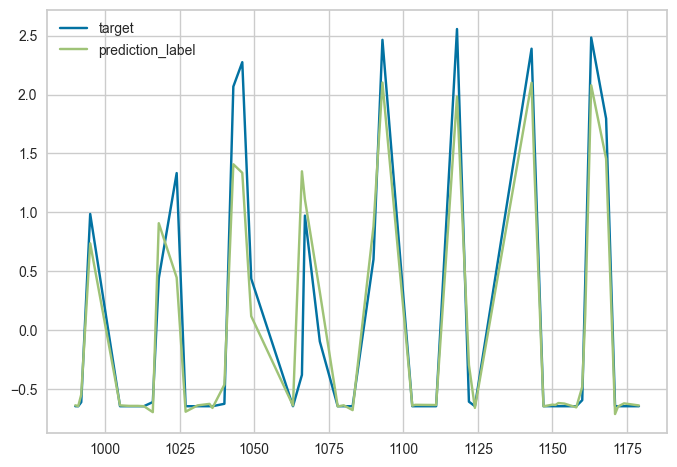

In [514]:
lig_result[['target','prediction_label']].iloc[250:300,:].plot()